In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
df.isna().sum()

Avg. Area Income                10
Avg. Area House Age              0
Avg. Area Number of Rooms        5
Avg. Area Number of Bedrooms     6
Area Population                  0
Price                            0
Address                          0
dtype: int64

In [4]:
df.isna().sum()/len(df)*100

Avg. Area Income                0.20
Avg. Area House Age             0.00
Avg. Area Number of Rooms       0.10
Avg. Area Number of Bedrooms    0.12
Area Population                 0.00
Price                           0.00
Address                         0.00
dtype: float64

In [5]:
df = df.drop(columns=['Address'],axis=1)
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


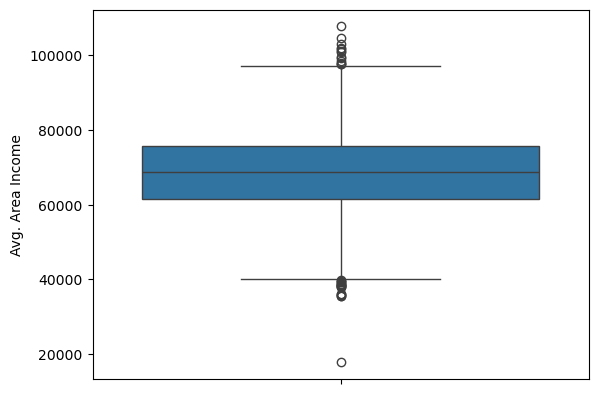

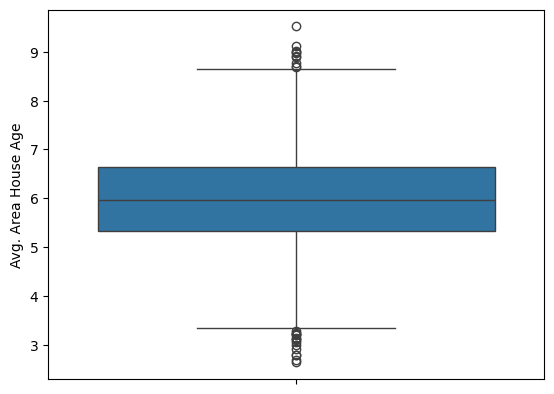

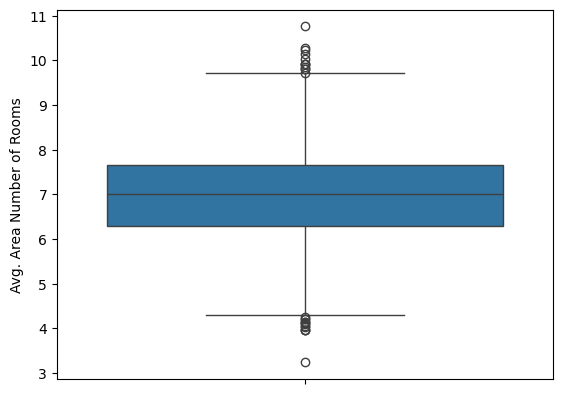

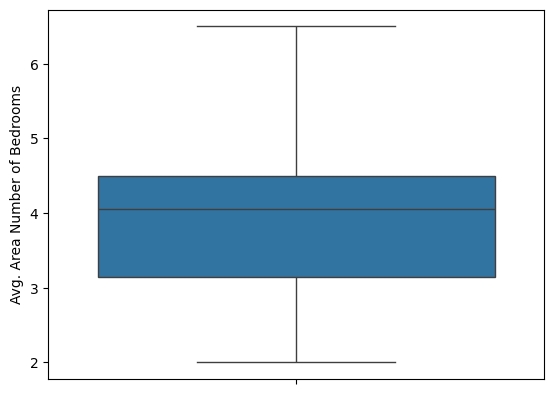

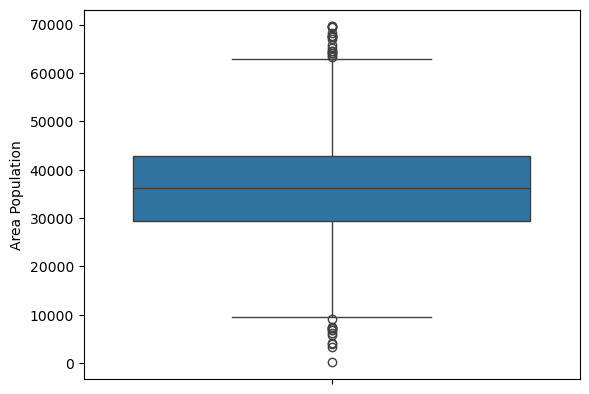

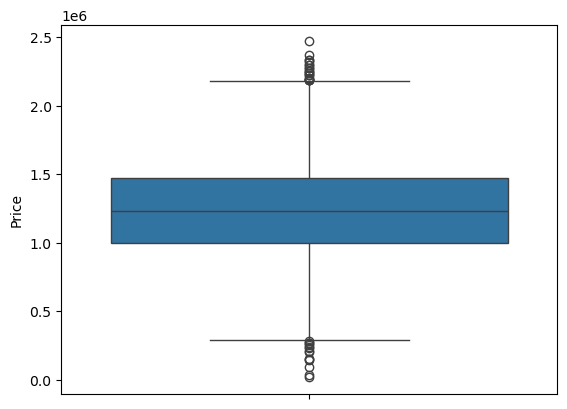

In [6]:
def outliers(col):
    sns.boxplot(df[col])
    plt.show()
for i in df.columns:
    outliers(i)

In [7]:
def remove_out(col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    df[col] = np.where(df[col]>upper, upper, np.where(df[col]<lower, lower, df[col]))

In [8]:
remove_out('Avg. Area Income')
remove_out('Avg. Area House Age')
remove_out('Avg. Area Number of Rooms')
remove_out('Area Population')
remove_out('Price')

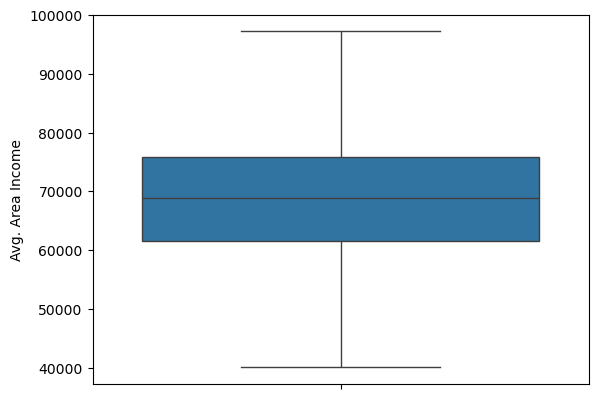

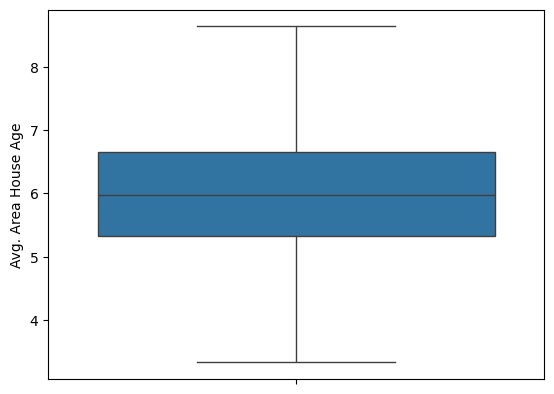

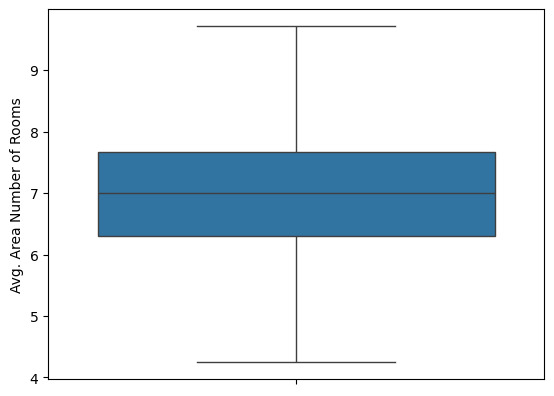

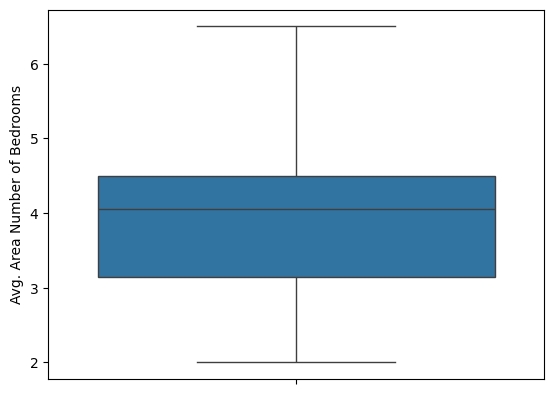

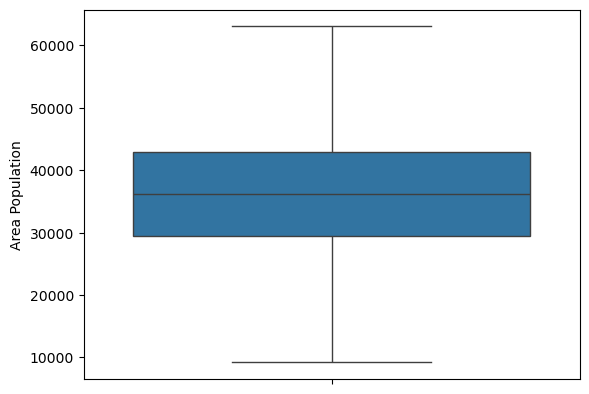

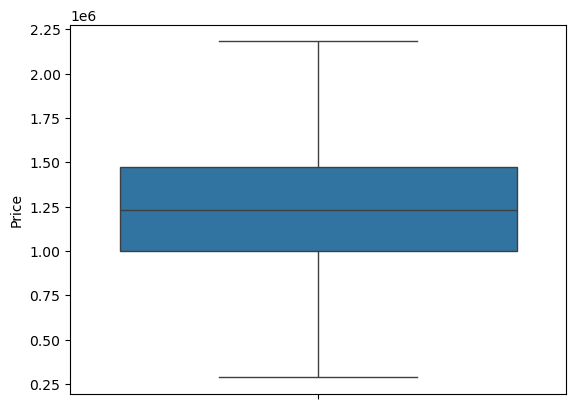

In [9]:
for i in df.columns:
    outliers(i)

In [10]:
df.isna().sum()

Avg. Area Income                10
Avg. Area House Age              0
Avg. Area Number of Rooms        5
Avg. Area Number of Bedrooms     6
Area Population                  0
Price                            0
dtype: int64

In [11]:
def fillna(col):
    df[col] = df[col].fillna(df[col].mean())

In [12]:
fillna('Avg. Area Income')
fillna('Avg. Area Number of Rooms')
fillna('Avg. Area Number of Bedrooms')

In [13]:
df.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

In [14]:
x = df.drop(['Price'],axis=1)
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947


In [15]:
y = df['Price']
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [16]:
x.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,68587.053397,5.977490,6.987524,3.981874,36159.070769
std,10574.892508,0.986995,1.001442,1.233756,9862.221143
min,40034.944565,3.329495,4.249455,2.000000,9217.885595
25%,61485.150192,5.322283,6.299692,3.140000,29403.928700
50%,68780.040760,5.970429,7.002506,4.050000,36199.406690
75%,75766.519103,6.650808,7.665281,4.490000,42861.290770
max,97225.666005,8.643597,9.715323,6.500000,63047.333875


In [17]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002619,-0.011003,0.019129,-0.014311,0.638489
Avg. Area House Age,-0.002619,1.000000,-0.009568,0.007134,-0.018191,0.452011
Avg. Area Number of Rooms,-0.011003,-0.009568,1.000000,0.463592,0.000479,0.334774
Avg. Area Number of Bedrooms,0.019129,0.007134,0.463592,1.000000,-0.022105,0.171319
Area Population,-0.014311,-0.018191,0.000479,-0.022105,1.000000,0.408916
Price,0.638489,0.452011,0.334774,0.171319,0.408916,1.000000


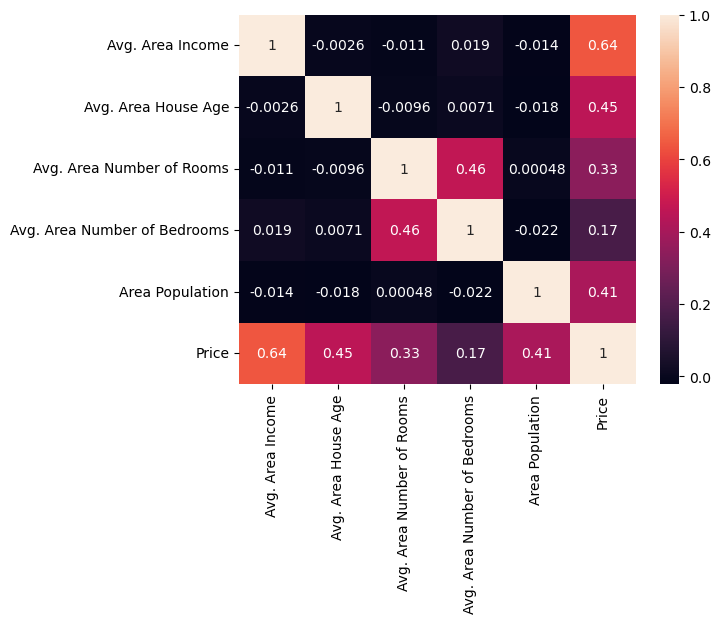

In [18]:
sns.heatmap(df.corr(),annot=True)
plt.show()

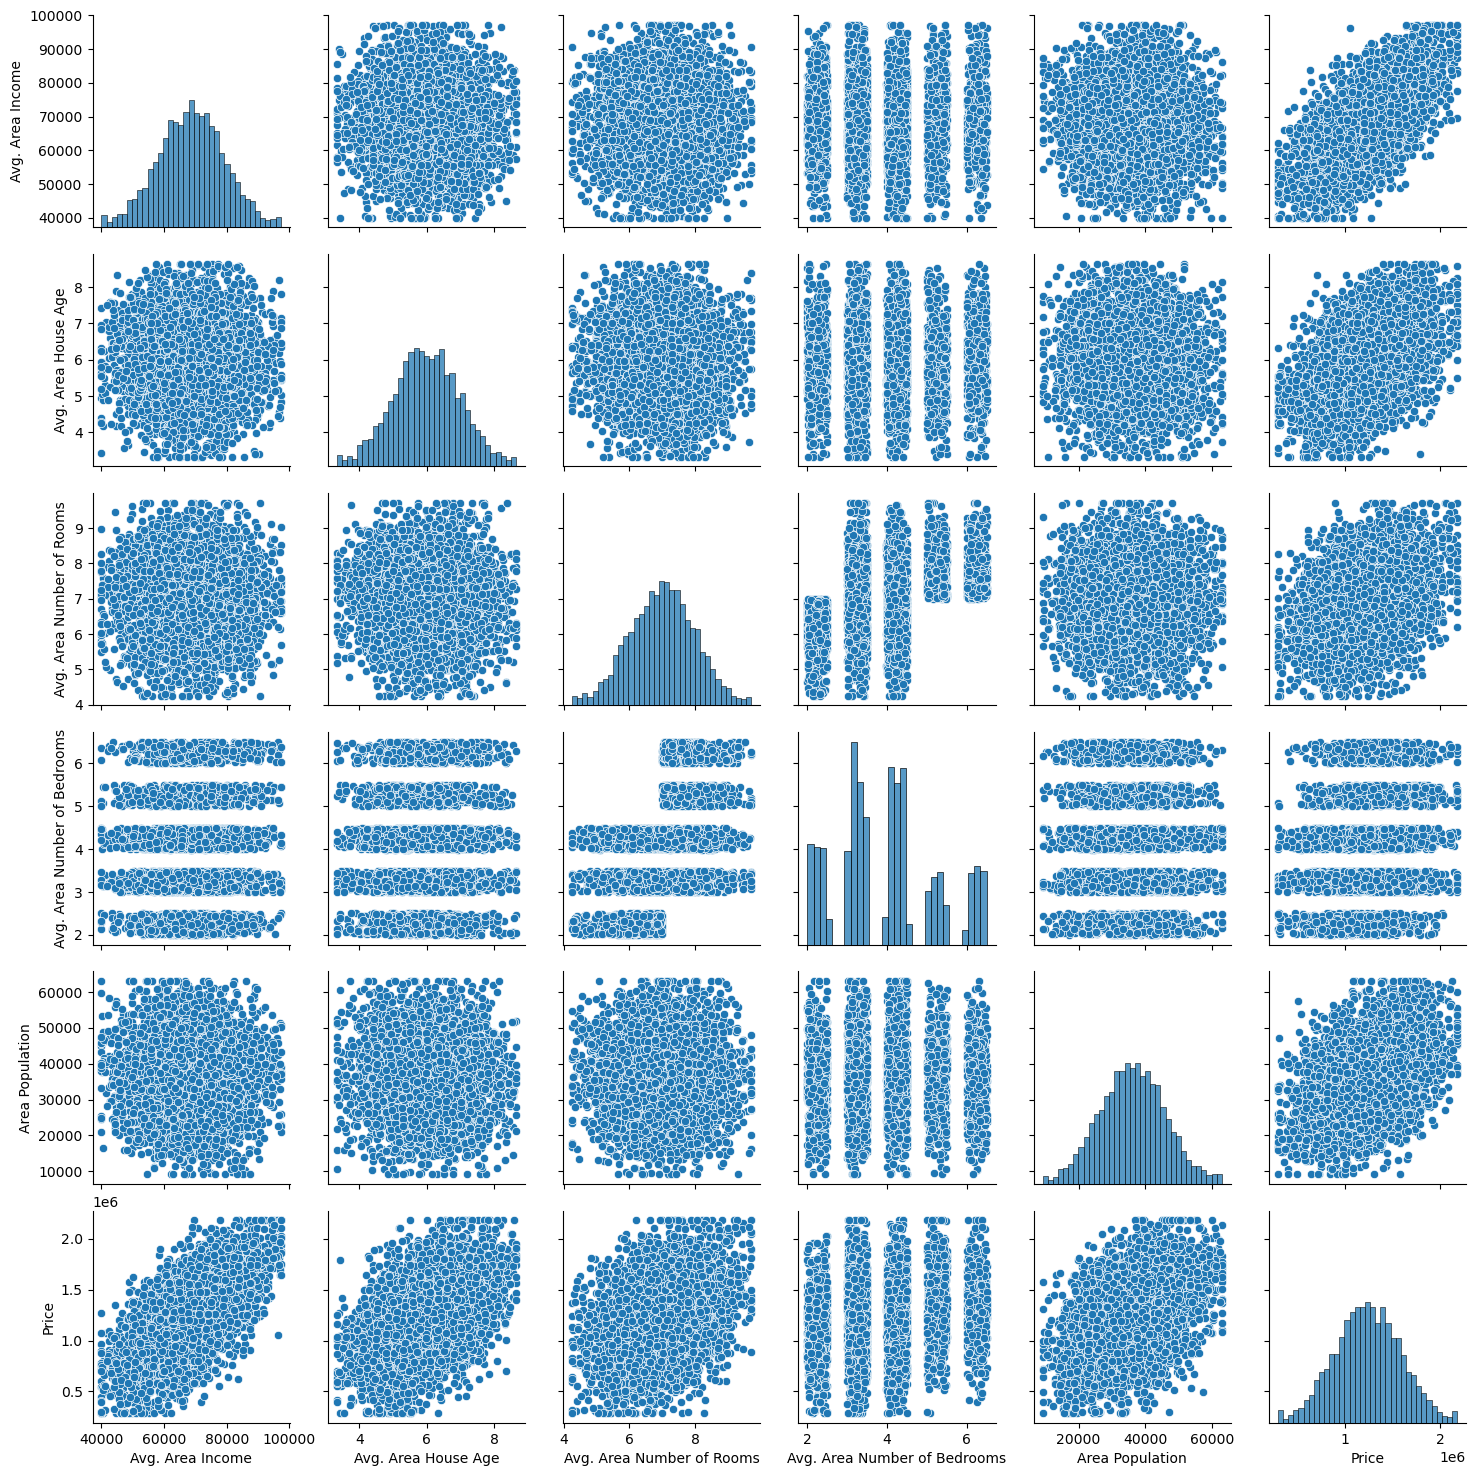

In [19]:
sns.pairplot(df)
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)
x = pd.DataFrame(x)

In [21]:
x.head()

,0,1,2,3,4
0,1.036370,-0.298541,0.021635,0.087648,-1.325622
1,1.008299,0.025747,-0.256359,-0.722966,0.407049
2,-0.690382,-0.113082,1.523159,0.930687,0.073326
3,-0.495734,1.226822,-1.398917,-0.585161,-0.187484
4,-0.813788,-0.949376,0.850722,0.201134,-0.994293


In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=32)

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [24]:
y_pred_train = lr.predict(x_train)

In [25]:
y_pred_test = lr.predict(x_test)

In [26]:
from sklearn.metrics import r2_score
print(r2_score(y_train,y_pred_train))
print("*"*100)
print(r2_score(y_test,y_pred_test))

0.9137231306465793
****************************************************************************************************
0.9187862807946956


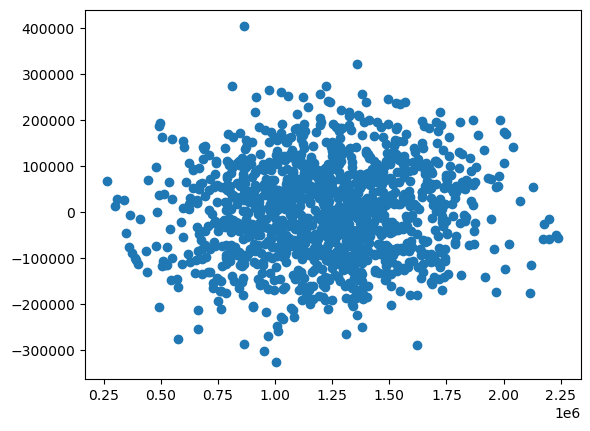

In [27]:
residuals = y_test - y_pred_test
plt.scatter(y_pred_test, residuals)
plt.show()

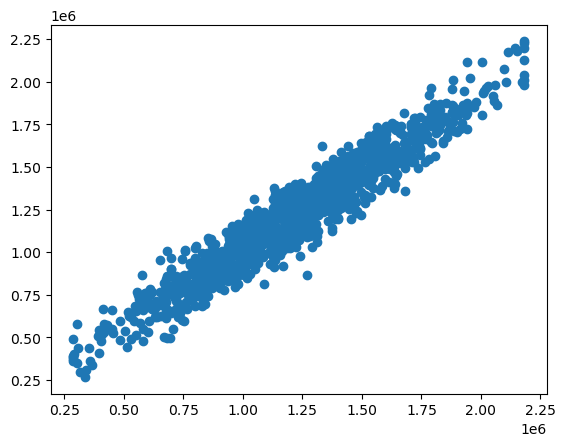

In [30]:
plt.scatter(y_test,y_pred_test)
plt.show()